# Multilevel Sentiment Analysis < Amazon consumer review dataset >


- Multilevel Sentiment Analysis from bag-of-words and TF-IDF vector <br>
- Feature importance (Most positive, most negative words for classification)
- Libraries: nltk, sklearn
- Dataset from https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products

In [1]:
import pandas as pd

<font color='navy'><font size=3.5>First, import csv type Amazon consumer review dataset

In [73]:
# Import dataset
data = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [3]:
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


# <font color='red'><font size="3"> **Exploratory data analysis (EDA)** 

<font color='navy'><font size=3.5>Histogram of ratings 

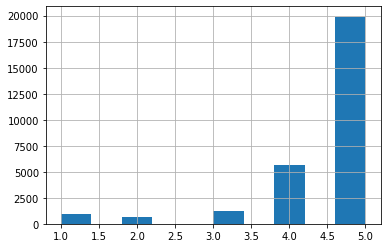

In [74]:
data['reviews.rating'].hist()

> --> <font color='navy'><font size=3.5>The number of rating 4 and 5 is higher than rating 1, 2, and 3, which indicates most of reviews are positive. 

<font color='navy'><font size=3.5> Among several data columns, I am going to use <br>
<font color='navy'><font size=3.5> - review.rating: Label <br>
<font color='navy'><font size=3.5> - review.text : Feature <br>

In [4]:
ins = data['reviews.text']
outs = data['reviews.rating']
del data

In [5]:
ins = list(ins)
outs = list(outs)

In [6]:
# Split data into training and validation set
from sklearn.model_selection import train_test_split
train_in, val_in, train_out, val_out = train_test_split(ins, outs, test_size=0.2, random_state=42) 

In [7]:
print(len(train_in), len(train_out))

22665 22665


<font color='navy'><font size=3.5>Print sample text before cleaning text

In [8]:
print(train_in[1000])
print(train_out[1000])

The Amazon fire HD10 is one of the best deals on the market. I've had a IPad and would rather have the HD10! It's what-1/3 of the price of a IPad and just as good, if not better
5


In [9]:
# function to prepare and clean the text before processing
import re
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_clean(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = GOOD_SYMBOLS_RE.sub('', text)
    text = ' '.join([x for x in text.split() if x and x not in STOPWORDS])
    return text.strip()

<font color='navy'><font size=3.5>Text cleaning 

In [10]:
train_in = [text_clean(text) for text in train_in]
val_in = [text_clean(text) for text in val_in]

Sample text after text cleaning

In [11]:
print(train_in[1000])
print(train_out[1000])

amazon fire hd10 one best deals market ive ipad would rather hd10 what1 3 price ipad good better
5


In [12]:
from collections import Counter
from nltk.tokenize.treebank import TreebankWordTokenizer

words_counts = {}
vocabulary=[]
twd = TreebankWordTokenizer()
for text in train_in:
    vocabulary.extend(twd.tokenize(text))
words_counts = Counter(vocabulary)

<font color='navy'><font size=3.5>The most frequent words from review

In [13]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
print(most_common_words[0:50])
train_tokens = [k[0] for k in most_common_words]

[('great', 7487), ('batteries', 6426), ('tablet', 5324), ('good', 4678), ('price', 4101), ('use', 3512), ('amazon', 2920), ('love', 2801), ('bought', 2525), ('easy', 2306), ('kindle', 2281), ('one', 2163), ('kids', 2052), ('like', 2011), ('long', 1978), ('well', 1952), ('work', 1876), ('last', 1868), ('buy', 1798), ('fire', 1767), ('loves', 1744), ('product', 1659), ('time', 1648), ('would', 1636), ('battery', 1630), ('old', 1621), ('get', 1451), ('apps', 1408), ('games', 1355), ('year', 1337), ('much', 1264), ('screen', 1207), ('dont', 1193), ('works', 1184), ('better', 1154), ('really', 1105), ('best', 1105), ('books', 1098), ('quality', 1094), ('purchased', 1085), ('brand', 1023), ('far', 1005), ('also', 1002), ('got', 987), ('nice', 956), ('used', 946), ('read', 945), ('play', 928), ('reading', 920), ('value', 910)]


<font color='navy'><font size=3.5>The train output has 5 classes. Apply label encoding, and one hot encoding to make y binary

In [14]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
train_out = le.fit_transform(train_out)
print(list(le.classes_))
train_out = train_out.reshape(len(train_out),1)
train_out = OneHotEncoder().fit_transform(train_out)


val_out = LabelEncoder().fit_transform(val_out)
val_out = val_out.reshape(len(val_out),1)
val_out = OneHotEncoder().fit_transform(val_out)

[1, 2, 3, 4, 5]


In [15]:
train_out.shape

(22665, 5)

<font color='red'><font size="3"> **1) words to vector: count vectors are features** 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word', max_features=10000)
count_vect.fit(train_in)
train_in_count =  count_vect.transform(train_in)
val_in_count =  count_vect.transform(val_in)

In [23]:
train_in_count

<22665x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 273867 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf_count = OneVsRestClassifier(LogisticRegression(penalty='l2', C = 10, max_iter=1000))
clf_count.fit(train_in_count, train_out)
pred_count = clf_count.predict(val_in_count)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    f1_macro = f1_score(y_val, predicted, average='macro')
    f1_micro = f1_score(y_val, predicted, average='micro')             
    f1_weighted = f1_score(y_val, predicted, average='weighted')  
                           
    print("Accuracy score=", accuracy_score(y_val, predicted))
    print("F1-score(macro/micro/weighted)= %.2f, %.2f, %.2f" %(f1_macro, f1_micro, f1_weighted)) 

In [58]:
print('Bag-of-words')
val_out_decoded = np.argmax(val_out, axis = 1)
pred_count_decoded = np.argmax(pred_count, axis = 1)
print_evaluation_scores(val_out_decoded , pred_count_decoded )

Bag-of-words
Accuracy score= 0.7686606670195871
F1-score(macro/micro/weighted)= 0.55, 0.77, 0.77


In [55]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(val_out_decoded , pred_count_decoded)

<font color='red'><font size="3"> **2) TF-IDF feature**

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect =  TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1, 2))
tfidf_vect.fit(train_in)
train_in_tfidf = tfidf_vect.transform(train_in)
val_in_tfidf = tfidf_vect.transform(val_in)

In [60]:
train_in_tfidf

<22665x11764 sparse matrix of type '<class 'numpy.float64'>'
	with 376546 stored elements in Compressed Sparse Row format>

In [61]:
clf_tfidf = OneVsRestClassifier(LogisticRegression(penalty='l2', C = 10,  max_iter=1000))
clf_tfidf.fit(train_in_tfidf, train_out)
pred_tfidf = clf_tfidf.predict(val_in_tfidf)

In [62]:
print('TF-IDF')
val_out_decoded = np.argmax(val_out, axis = 1)
pred_count_decoded = np.argmax(pred_tfidf, axis = 1)
print_evaluation_scores(val_out_decoded , pred_count_decoded )

TF-IDF
Accuracy score= 0.7781895182636316
F1-score(macro/micro/weighted)= 0.50, 0.78, 0.77


<font color='red'><font size="3"> **Feature Importance: print important features (words) for prediction**

In [76]:
from scipy import sparse as sp_sparse
DICT_SIZE = 10000

WORDS_TO_INDEX  = dict()
INDEX_TO_WORDS = dict()
for index, key in enumerate(dict(sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE])):
    WORDS_TO_INDEX[key] = index
    INDEX_TO_WORDS[index] = key
    
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    for word in list(text.split()): 
        idx = words_to_index.get(word)
        if idx != None:
            result_vector[idx] = 1
    return list(result_vector)

train_in_count = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in train_in])


In [77]:
clf_count = OneVsRestClassifier(LogisticRegression(penalty='l2', C = 1, max_iter=1000))
clf_count.fit(train_in_count, train_out)
#pred_count = clf_count.predict(val_in_count)

OneVsRestClassifier(estimator=LogisticRegression(C=1, max_iter=1000))

In [78]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """    
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 
    
    est = classifier.estimators_[tags_classes.index(tag)]
    top_positive_words = [index_to_words[index] for index in est.coef_.argsort().tolist()[0][-5:]]  # top-5 words sorted by the coefficiens.
    top_negative_words = [index_to_words[index] for index in est.coef_.argsort().tolist()[0][:5]] # bottom-5 words  sorted by the coefficients.
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [79]:
list_classes = list(le.classes_)
for i in range (len(list_classes)):
    label = list_classes[i] 
    est = clf_count.estimators_[i]
    top_positive_words = [INDEX_TO_WORDS[index] for index in est.coef_.argsort().tolist()[0][-10:]]  # top-5 words sorted by the coefficiens.
    top_negative_words = [INDEX_TO_WORDS[index] for index in est.coef_.argsort().tolist()[0][:10]] # bottom-5 words  sorted by the coefficients.
    print('class=', label)
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

class= 1
Top positive words:	die, turn, waste, leaking, junk, returned, dead, returning, worst, terrible
Top negative words:	great, excellent, always, nice, ok, perfect, loves, love, value, longer

class= 2
Top positive words:	accidentally, exchange, dont, poor, timer, entire, half, originally, unfortunately, disappointed
Top negative words:	loves, love, ever, great, expensive, easy, perfect, excellent, enough, per

class= 3
Top positive words:	grandma, alittle, dif, 65, yr, playimg, visual, 10and, sudden, group
Top negative words:	love, never, away, ability, minutes, great, expensive, loves, durable, beat

class= 4
Top positive words:	potential, 16g, spouse, 87, tho, louder, downside, seemingly, stars, 4g
Top negative words:	numbers, section, terrible, returning, playstore, wonderful, hdx, asking, packs, inappropriate

class= 5
Top positive words:	60, plenty, previously, section, met, felt, forget, unbeatable, numbers, aged
Top negative words:	worst, terrible, leaked, sucks, dead, com

> <font color='navy'><font size=3.5> --> The most positive words for rating 1 are terrible, worsts, returning, which explain low rating. However, the most positive words for rating 5 are aged, numbers, unbeatable, forget, felt which are more random. Since most of ratings are 5 or 4, top positive words are selected because they are  most common words in any reviews. 